In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('full_limpo.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,id,url,header,address,area,rooms,bathrooms,garages,amenities,price,condo,crawler,crawled_at,neighborhood
0,2558558970,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto para Aluguel, 49m²","Rua Itu, 86 - Centro, Campinas - SP",49,1,2,1,Portão eletrônico,950,583.0,Campinas,2022-05-11 22:33,Centro
1,2541694419,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos para Aluguel, 76m²","Avenida João Scarparo Netto, 240 - Loteamento ...",76,3,2,2,Piscina\nChurrasqueira\nElevador\nCondomínio f...,490000,472.0,Campinas,2022-05-11 22:33,Loteamento Center Santa Genebra
2,2559659498,https://www.vivareal.com.br/imovel/apartamento...,Apartamento com 2 Quartos para Venda/Aluguel 75m²,"Rua Hermantino Coelho, 161 - Mansões Santo Ant...",75,2,2,1,Varanda,2600,600.0,Campinas,2022-05-11 22:33,Mansões Santo Antônio
3,2561701454,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos para Aluguel, 103m²","Avenida Wellman Galvão de França Rangel, 798 -...",103,3,3,2,Piscina\nChurrasqueira\nElevador\nAcademia\nPl...,3500,1000.0,Campinas,2022-05-11 22:33,Swiss Park
4,2561568233,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos para Aluguel, 72m²","Rua Serra dos Itatins - Jardim Proença, Campin...",72,2,1,1,Cozinha\nElevador\nInterfone\nLavanderia,750,650.0,Campinas,2022-05-11 22:33,Jardim Proença


In [3]:
df.columns

Index(['id', 'url', 'header', 'address', 'area', 'rooms', 'bathrooms',
       'garages', 'amenities', 'price', 'condo', 'crawler', 'crawled_at',
       'neighborhood'],
      dtype='object')

In [4]:
df.shape

(177, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            177 non-null    int64  
 1   url           177 non-null    object 
 2   header        177 non-null    object 
 3   address       177 non-null    object 
 4   area          177 non-null    int64  
 5   rooms         177 non-null    int64  
 6   bathrooms     177 non-null    int64  
 7   garages       177 non-null    object 
 8   amenities     154 non-null    object 
 9   price         177 non-null    int64  
 10  condo         166 non-null    float64
 11  crawler       177 non-null    object 
 12  crawled_at    177 non-null    object 
 13  neighborhood  177 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 19.5+ KB


### Imputando valores

In [6]:
df.shape

(177, 14)

In [7]:
df.isnull().sum()

id               0
url              0
header           0
address          0
area             0
rooms            0
bathrooms        0
garages          0
amenities       23
price            0
condo           11
crawler          0
crawled_at       0
neighborhood     0
dtype: int64

In [8]:
a = df.price.median()

In [9]:
df['price'] = df['price'].fillna(a)
df['condo'] = df['condo'].fillna(2.0)
df = df.dropna()

In [10]:
df.shape

(154, 14)

In [11]:
df.isnull().sum()

id              0
url             0
header          0
address         0
area            0
rooms           0
bathrooms       0
garages         0
amenities       0
price           0
condo           0
crawler         0
crawled_at      0
neighborhood    0
dtype: int64

In [12]:
df.index = df['id']
df = df.drop(['id'],axis=1)
df.head()

,url,header,address,area,rooms,bathrooms,garages,amenities,price,condo,crawler,crawled_at,neighborhood
id,,,,,,,,,,,,,
2558558970,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto para Aluguel, 49m²","Rua Itu, 86 - Centro, Campinas - SP",49,1,2,1,Portão eletrônico,950,583.0,Campinas,2022-05-11 22:33,Centro
2541694419,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos para Aluguel, 76m²","Avenida João Scarparo Netto, 240 - Loteamento ...",76,3,2,2,Piscina\nChurrasqueira\nElevador\nCondomínio f...,490000,472.0,Campinas,2022-05-11 22:33,Loteamento Center Santa Genebra
2559659498,https://www.vivareal.com.br/imovel/apartamento...,Apartamento com 2 Quartos para Venda/Aluguel 75m²,"Rua Hermantino Coelho, 161 - Mansões Santo Ant...",75,2,2,1,Varanda,2600,600.0,Campinas,2022-05-11 22:33,Mansões Santo Antônio
2561701454,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos para Aluguel, 103m²","Avenida Wellman Galvão de França Rangel, 798 -...",103,3,3,2,Piscina\nChurrasqueira\nElevador\nAcademia\nPl...,3500,1000.0,Campinas,2022-05-11 22:33,Swiss Park
2561568233,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos para Aluguel, 72m²","Rua Serra dos Itatins - Jardim Proença, Campin...",72,2,1,1,Cozinha\nElevador\nInterfone\nLavanderia,750,650.0,Campinas,2022-05-11 22:33,Jardim Proença


<AxesSubplot:>

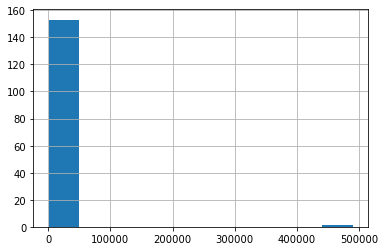

In [13]:
df.price.hist()

/home/emeferreira/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


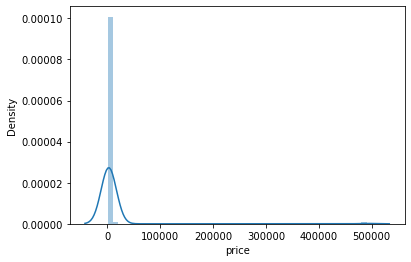

In [14]:
import seaborn as sns
sns.distplot(df['price']);

In [21]:
df = df[df.price <= 25000]

Text(0, 0.5, 'Aluguel')

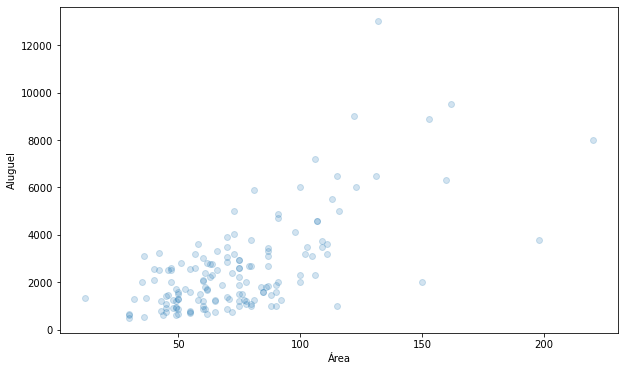

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('Área')
plt.ylabel('Aluguel')

In [24]:
df2 = df.sample(100)

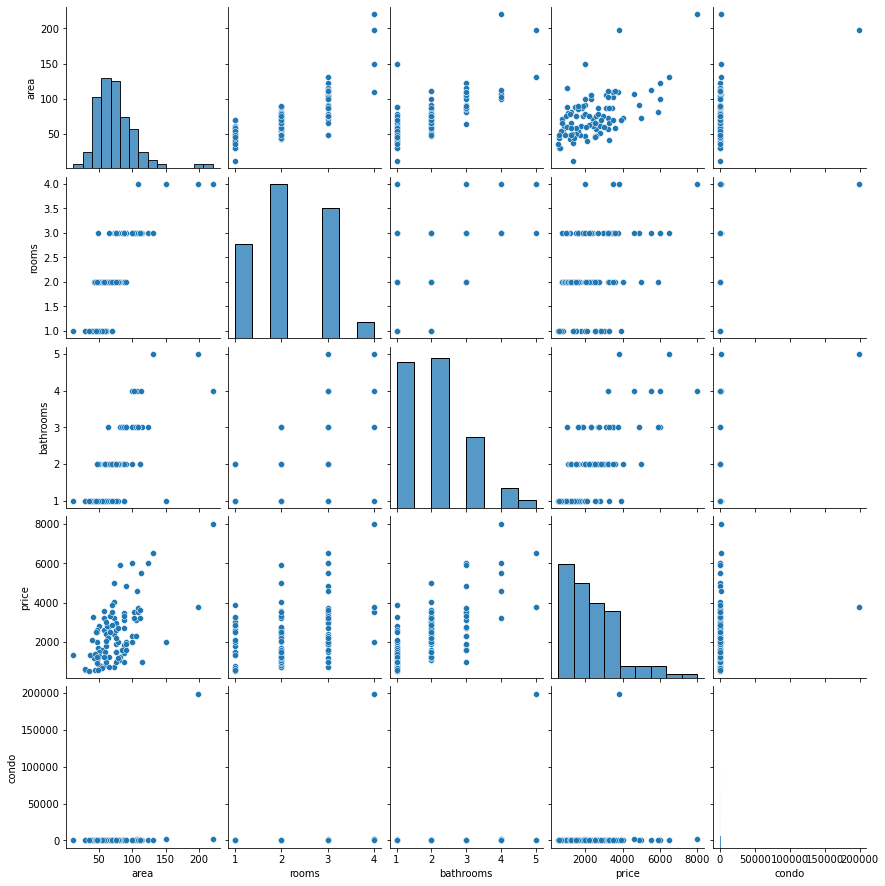

In [25]:
sns.pairplot(df2)

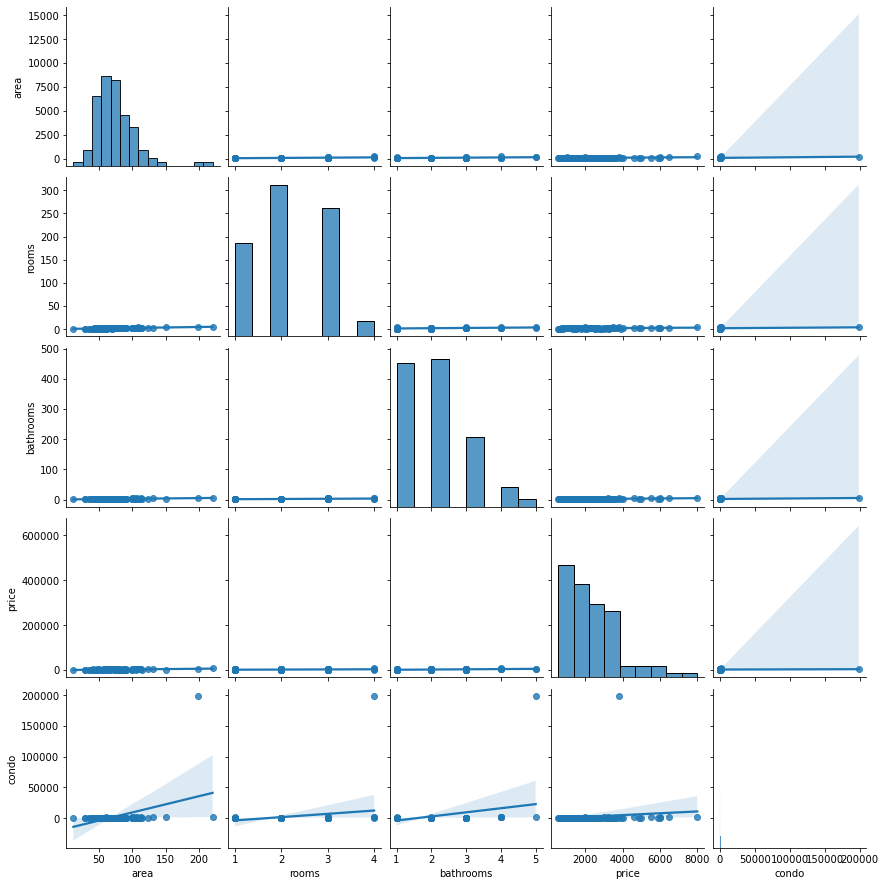

In [26]:
sns.pairplot(df2, kind='reg')

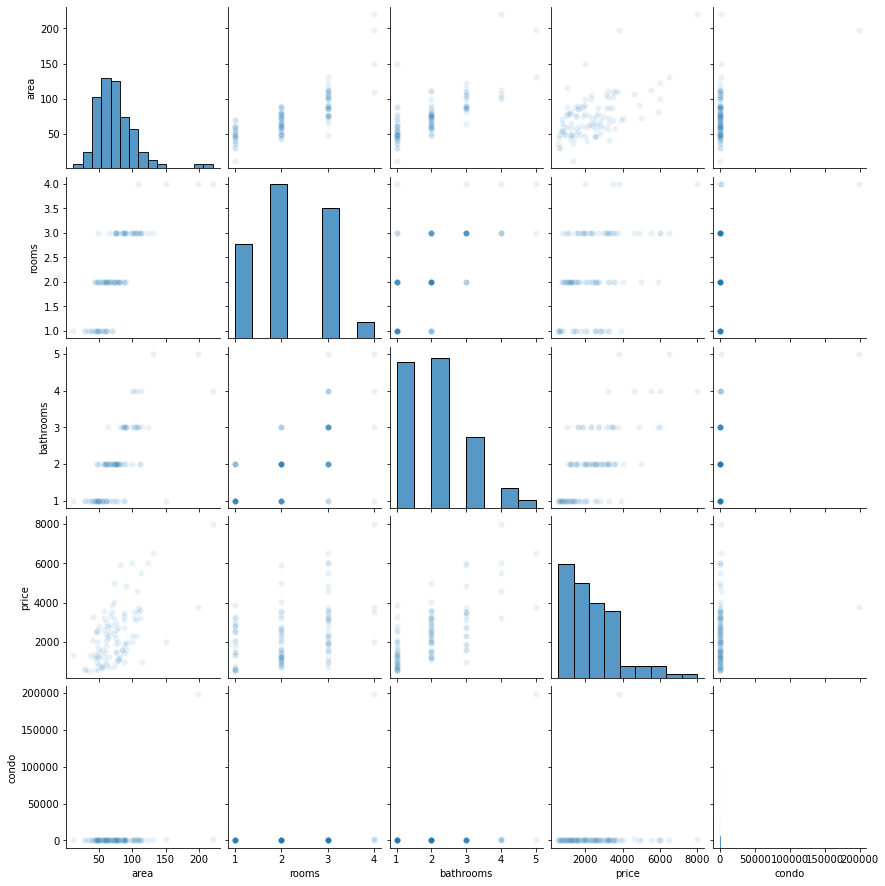

In [27]:
g = sns.pairplot(df2, plot_kws={'alpha':0.1})

In [28]:
df.corr()

,area,rooms,bathrooms,price,condo
area,1.000000,0.743376,0.785569,0.663839,0.354136
rooms,0.743376,1.000000,0.613515,0.393663,0.213115
bathrooms,0.785569,0.613515,1.000000,0.684207,0.246798
price,0.663839,0.393663,0.684207,1.000000,0.102432
condo,0.354136,0.213115,0.246798,0.102432,1.000000


<AxesSubplot:>

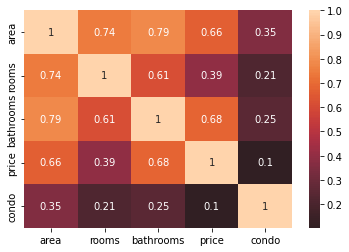

In [29]:
sns.heatmap(df.corr(), annot=True, center=0)

<AxesSubplot:>

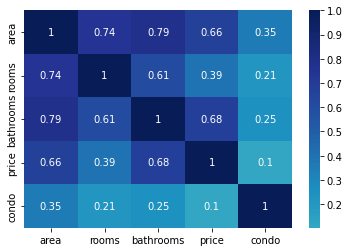

In [30]:
sns.heatmap(df.corr(), annot=True, center=0, cmap="YlGnBu")

<AxesSubplot:>

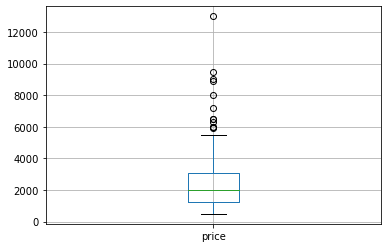

In [31]:
df.boxplot('price')

<AxesSubplot:xlabel='neighborhood', ylabel='price'>

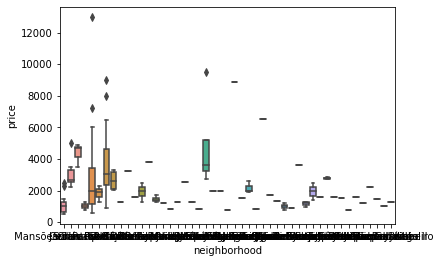

In [32]:
sns.boxplot(x='neighborhood', y='price', data=df)

In [33]:
centro = ['Centro','Bosque','Botafogo','Cambui','Jardim Guanabara','Vila Itapura','Vila Insdutrial']

norte = ['Norte','Bonfim','Barao Geraldo']

sul = ['Sul','Jardim Itatiaia']

leste = ['Leste','Alpha Ville Campinas','Taquaral']

oeste = ['Oeste','Parque das Universidades']

nenhuma = ['nenhuma']

In [34]:
def checar_zona(df,lista):
    df = df[df.address.str.contains('|'.join(lista))] # | em regex try to match each of the substrings in the words in your Serie
    df['zona'] = str(lista[0]) #posição zero de todas as listas é o nome dela mesma
    return df

In [35]:
df1 = checar_zona(df,centro)
df1.shape

/tmp/ipykernel_48289/1396595177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zona'] = str(lista[0]) #posição zero de todas as listas é o nome dela mesma


(29, 14)

In [36]:
df2 = checar_zona(df,sul)
df3 = checar_zona(df,leste)
df4 = checar_zona(df,oeste)
df5 = checar_zona(df,norte)

/tmp/ipykernel_48289/1396595177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zona'] = str(lista[0]) #posição zero de todas as listas é o nome dela mesma


In [37]:
bairros = nenhuma + sul + oeste + norte + sul + centro + leste
def checarN_zona(df,lista):
    df = df[~df.address.str.contains('|'.join(bairros))]
    df['zona'] = str(lista[0])
    return df
df7 = checarN_zona(df,bairros)
df7.shape

/tmp/ipykernel_48289/609866126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zona'] = str(lista[0])


(117, 14)

In [38]:
df_concat = pd.concat([df1,df2,df3,df4,df5,df7])
df_concat.shape

(153, 14)

In [39]:
df_final = df_concat.drop_duplicates(subset=['address','price'], keep='last', inplace=False)

In [40]:
df_final.shape

(148, 14)

In [41]:
df_final.tail()

,url,header,address,area,rooms,bathrooms,garages,amenities,price,condo,crawler,crawled_at,neighborhood,zona
id,,,,,,,,,,,,,,
2561152190,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos para Aluguel, 91m²","Avenida Dermival Bernardes Siqueira, 1874 - Sw...",91,3,2,2,Piscina\nChurrasqueira\nElevador\nCondomínio f...,4700,699.0,Campinas,2022-05-11 22:34,Swiss Park,nenhuma
2554226404,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto para Aluguel, 50m²","Cambuí, Campinas - SP",50,1,1,1,Segurança 24h\nCozinha\nElevador\nInterfone,650,513.0,Campinas,2022-05-11 22:34,SP,nenhuma
2549579778,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto para Aluguel, 61m²","Jardim Paraíso, Campinas - SP",61,1,1,1,Condomínio fechado\nPortão eletrônico\nElevado...,1800,2.0,Campinas,2022-05-11 22:34,SP,nenhuma
2556511284,https://www.vivareal.com.br/imovel/apartamento...,Apartamento com 3 Quartos para Venda/Aluguel 1...,Avenida Maria Emília Alves dos Santos de Ângel...,162,3,5,3,Piscina\nChurrasqueira\nElevador\nGaragem\nLav...,9500,1550.0,Campinas,2022-05-11 22:34,Parque Prado,nenhuma
2551142661,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto para Aluguel, 51m²","Rua Major Solon, 616 - Cambuí, Campinas - SP",51,1,2,1,Piscina\nChurrasqueira\nAcademia\nVaranda gour...,2800,646.0,Campinas,2022-05-11 22:34,Cambuí,nenhuma


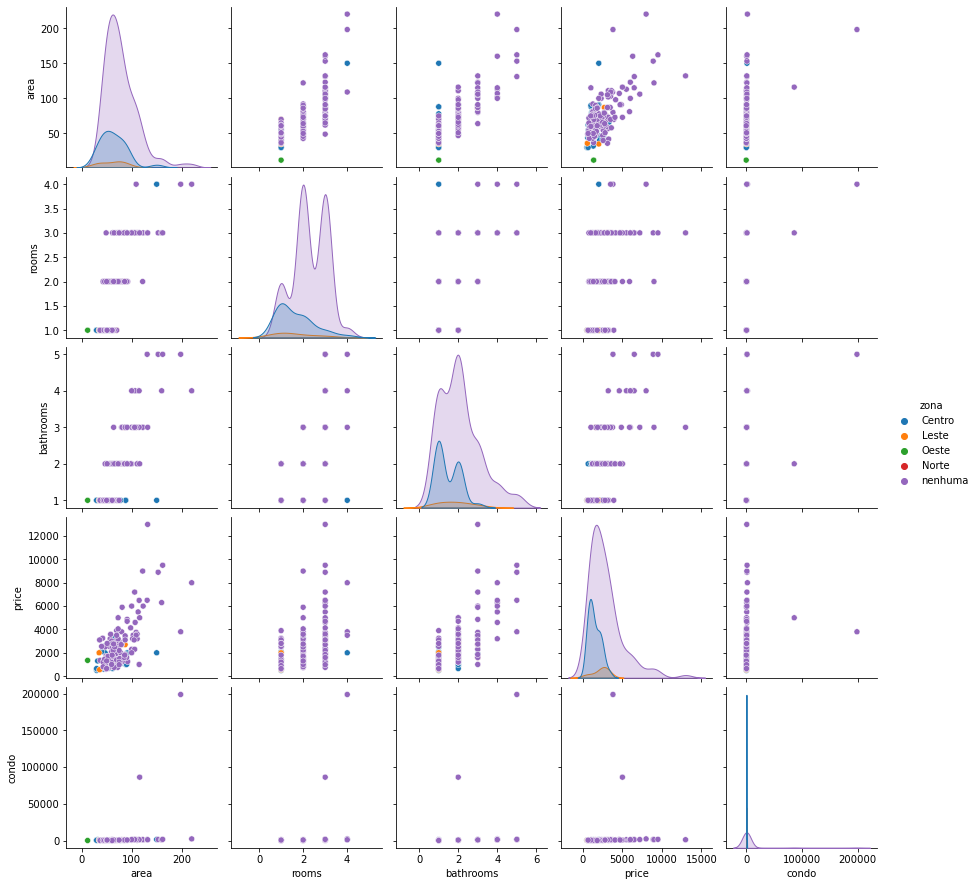

In [42]:
sns.pairplot(df_final,hue='zona')

<AxesSubplot:xlabel='zona', ylabel='price'>

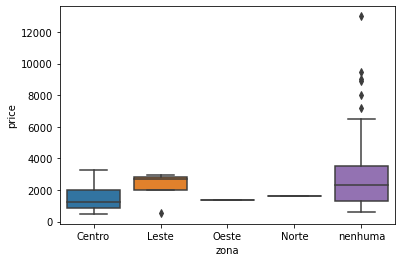

In [43]:
sns.boxplot(x='zona', y='price', data=df_final)

In [44]:
df_final.describe()

,area,rooms,bathrooms,price,condo
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,74.135135,2.148649,1.952703,2520.959459,2526.297297
std,31.496604,0.819531,0.978229,1977.158673,17702.565165
min,12.000000,1.000000,1.000000,490.000000,2.000000
25%,50.000000,2.000000,1.000000,1237.500000,395.000000
50%,70.000000,2.000000,2.000000,2000.000000,588.000000
75%,87.250000,3.000000,2.000000,3125.000000,772.500000
max,220.000000,4.000000,5.000000,13000.000000,198771.000000


In [45]:
df_final = df_final[df_final.zona != 'nenhuma']
df_final.shape

(35, 14)

/home/emeferreira/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


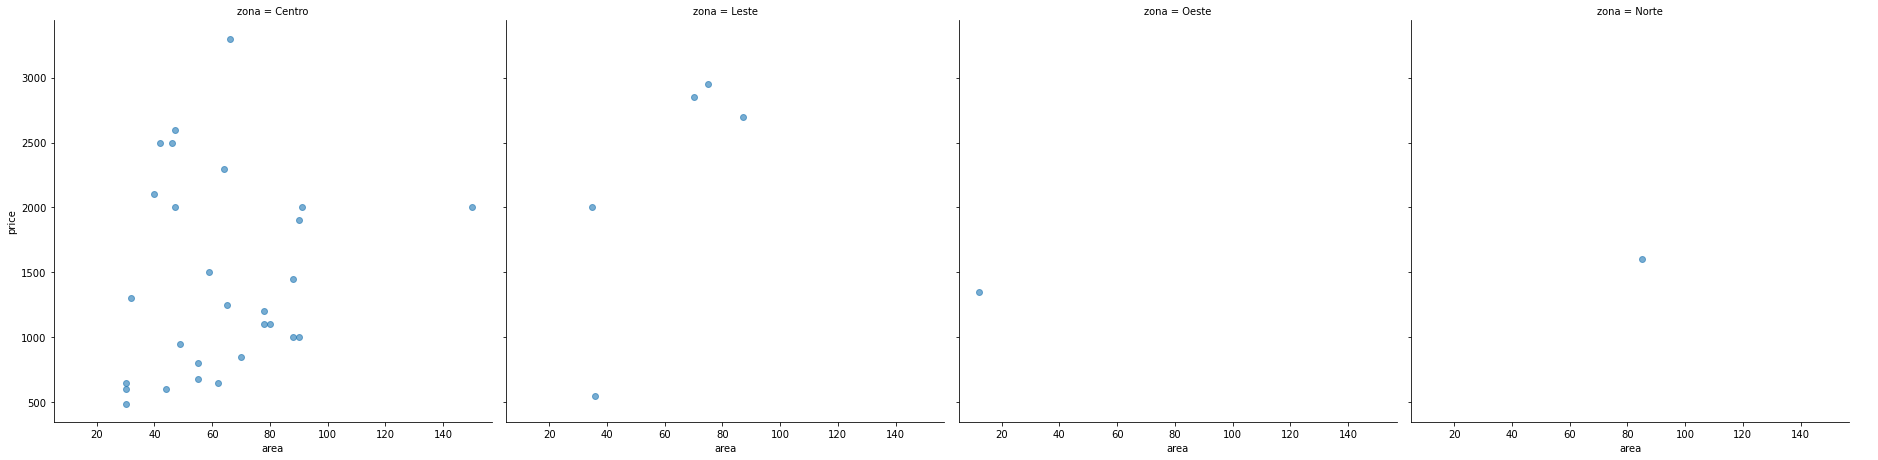

In [46]:
ax = sns.FacetGrid(df_final, col="zona", size=6.5)
ax.map(plt.scatter, "area", "price", alpha=.6)
ax.add_legend()

In [48]:
import plotly.graph_objs as go
from plotly.offline import iplot
# creating trace1
trace1 =go.Scatter(
                    x = df1.area,
                    y = df1.price,
                    mode = "markers",
                    name = "Centro",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df1.zona)

# creating trace2
trace2 =go.Scatter(
                    x = df2.area,
                    y = df2.price,
                    mode = "markers",
                    name = "Sul",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2.zona)

# creating trace3
trace3 =go.Scatter(
                    x = df3.area,
                    y = df3.price,
                    mode = "markers",
                    name = "Leste",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df3.zona)

trace4 =go.Scatter(
                    x = df4.area,
                    y = df4.price,
                    mode = "markers",
                    name = "Oeste",
                    marker = dict(color = 'rgba(0, 125, 100, 0.8)'),
                    text= df4.zona)

trace5 =go.Scatter(
                    x = df5.area,
                    y = df5.price,
                    mode = "markers",
                    name = "Norte",
                    marker = dict(color = 'rgba(0,0,255,0.7)'),
                    text= df5.zona)

data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Área e Preço do Aluguel em Campinas',
              xaxis= dict(title= 'Área'),
              yaxis= dict(title= 'Preço')
             )
fig = dict(data = data, layout = layout)
iplot(fig)